Durante este desafío, ayudarás al Sr. Juan a decidir qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, analizarás datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

* De cada tienda se obtuvieron las ventasm diarias realizadas entre el 1-enero-2020 al 31-marzo-2023.

*

### Lo que practicarás:

* Cargue y manipule datos CSV con la biblioteca Pandas.

* Cree visualizaciones de datos con la biblioteca Matplotlib.

* Analice métricas como ingresos, reseñas y rendimiento de ventas.

### Requisitos:

* Analizar datos de la tienda:

  * Evaluar información como los ingresos, las categorías más vendidas, las reseñas de los clientes, los productos más vendidos y el envío promedio.


* Crear gráficos para visualización:

  * Analizar qué tipos de gráficos utilizar para presentar los resultados de forma clara y visual.

  * Mínimo de 3 gráficos diferentes, que pueden incluir gráficos de barras, circulares, de dispersión y otros.


* Enviar una recomendación:

  * Después del análisis, escriba un texto explicando a qué tienda debería vender el Sr. Juan y por qué, basándose en los datos presentados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importación de datos

In [2]:
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda2['Fecha de Compra'] = pd.to_datetime(tienda2['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda3['Fecha de Compra'] = pd.to_datetime(tienda3['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')
tienda4['Fecha de Compra'] = pd.to_datetime(tienda4['Fecha de Compra'], format='%d/%m/%Y', errors='coerce')

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


**Estructura de datos:**
El conjunto de datos incluye la siguiente información:

* Producto y Categoría: Artículos vendidos y sus calificaciones.

* Precio y Envío: Valores de venta y costos asociados.

* Fecha y ubicación de compra: Información temporal y geográfica.

* Evaluación de compra: Comentarios de clientes.

* Tipo de Pago y Cuotas: Métodos utilizados por los clientes.

* Coordenadas Geográficas: Ubicación de las transacciones.

facturación total de cada tienda, es decir, cuál tienda vende más; cuáles son las categorías más populares de cada tienda, es decir, cuáles productos se venden más en cada tienda; cuál es el promedio de evaluación de cada uno de los clientes; cuáles son los productos más y menos vendidos en cada tienda; y cuál es el costo promedio del envío desde la tienda hasta el lugar de cada uno de los clientes.

# 1. Análisis de facturación

Tienda que tiene mayor cantidad de ventas

In [3]:
print('Cantidad de ventas de cada tienda:')
print('-> Tienda 1:', tienda1.shape[0])
print('-> Tienda 2:', tienda2.shape[0])
print('-> Tienda 3:', tienda3.shape[0])
print('-> Tienda 4:', tienda4.shape[0])

print('\nVentas totales de cada tienda:')
print('-> Tienda 1:', tienda1['Precio'].sum())
print('-> Tienda 2:', tienda2['Precio'].sum())
print('-> Tienda 3:', tienda3['Precio'].sum())
print('-> Tienda 4:', tienda4['Precio'].sum())

print('\nPromedio de precios de cada tienda:')
print('-> Tienda 1:', tienda1['Precio'].mean())
print('-> Tienda 2:', tienda2['Precio'].mean())
print('-> Tienda 3:', tienda3['Precio'].mean())
print('-> Tienda 4:', tienda4['Precio'].mean())

Cantidad de ventas de cada tienda:
-> Tienda 1: 2359
-> Tienda 2: 2359
-> Tienda 3: 2359
-> Tienda 4: 2358

Ventas totales de cada tienda:
-> Tienda 1: 1150880400.0
-> Tienda 2: 1116343500.0
-> Tienda 3: 1098019600.0
-> Tienda 4: 1038375700.0

Promedio de precios de cada tienda:
-> Tienda 1: 487867.9101314116
-> Tienda 2: 473227.42687579483
-> Tienda 3: 465459.7710894447
-> Tienda 4: 440362.89228159457


* Todas las tiendas tienen la misma cantidad de ventas, a excepción de la tienda 4 que tiene una venta menos, sin embargo esto ocurre porque únicamente se recibieron las ventas diarias hasta el 30 de marzo del 2023.

* La tienda 1 generó la mayor cantidad de ingresos totales, lo que podría traducirse en la venta de productos más costosos. Las ventas totales de las tiendas disminuyen progresivamente de la tienda 1 a la 4, siendo la tienda 4 la que menos ingresos generó, y con una diferencia significativa comparada con las demás tiendas.

* El promedio de precios por transacción disminuye en orden numérico de las tiendas (1 > 2 > 3 > 4), lo que explica la diferencia en las ventas totales a pesar de tener una cantidad de transacciones muy similar.

> La Tienda 1 parece ser la más exitosa en términos de ingresos totales y valor promedio de cada venta.
>
> La Tienda 4 es la que tiene el rendimiento más bajo en todas las métricas: cantidad de ventas (por un margen mínimo), ventas totales y, especialmente, promedio de precios por transacción. Esto podría indicar que la estrategia de precios no es tan efectiva.


# 2. Ventas por categoría

Categorías más populares o productos más vendidos en cada tienda

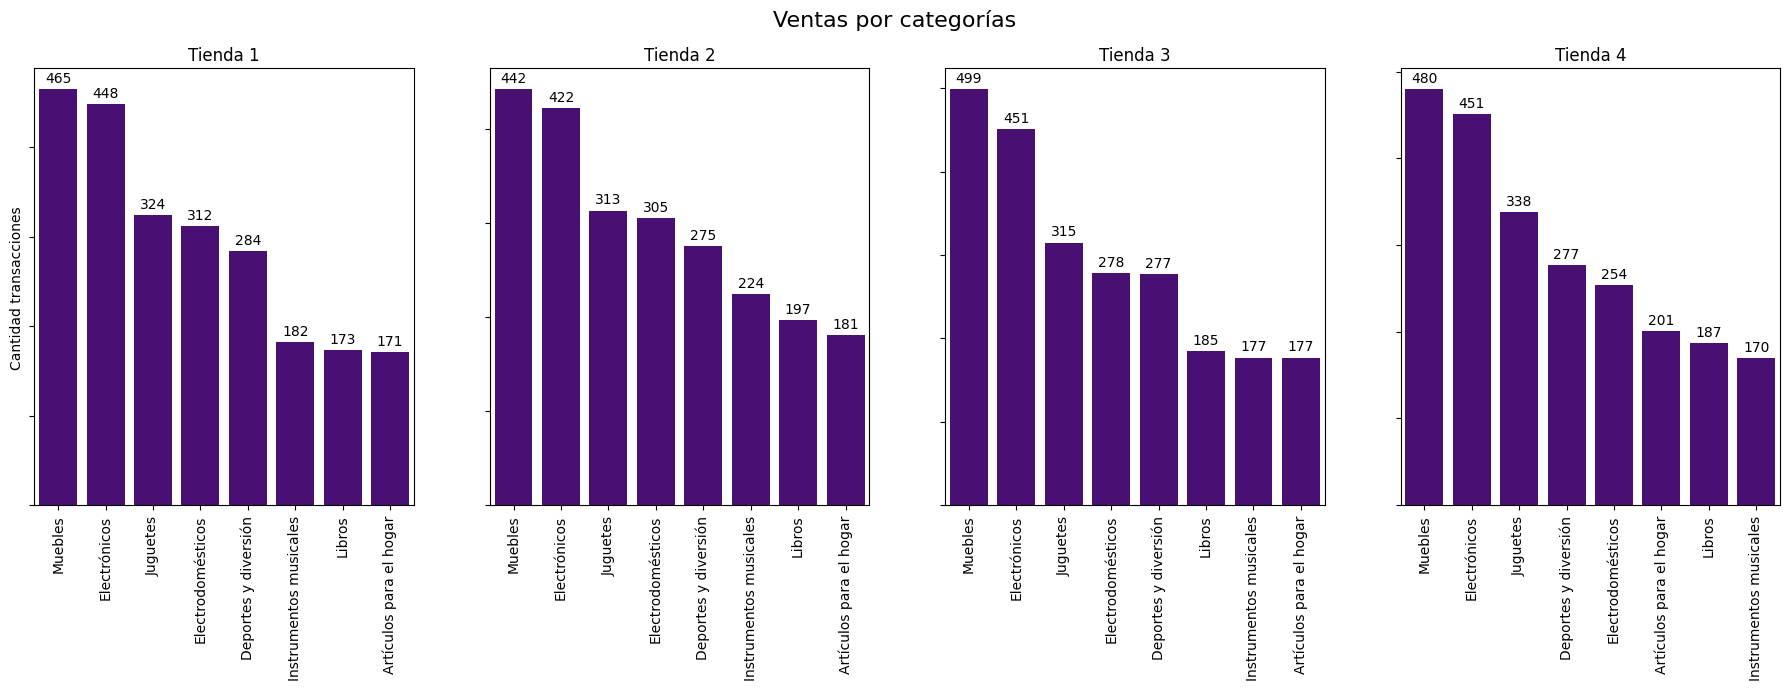

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(18, 7))
fig.suptitle('Ventas por categorías', fontsize=16)

for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4]):
    categorias = tienda['Categoría del Producto'].value_counts().reset_index()
    categorias.columns = ['Categoría del Producto', 'Cantidad de transacciones']
    sns.barplot(x='Categoría del Producto', y='Cantidad de transacciones', data=categorias, ax=axes[i], color='indigo')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].tick_params(axis='y', labelleft=False)
    axes[i].set_title(f'Tienda {i+1}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Cantidad transacciones' if i==0 else '')

    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='{:,.0f}', label_type='edge', padding=3)

# axes[0].set_ylabel('Cantidad transacciones')
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

* En todas las tiendas, las categorías de "Muebles" y "Electrónicos" son consistentemente las que registran el mayor número de transacciones. Esto sugiere que estas categorías son las más populares entre los clientes, independientemente de la ubicación de la tienda.

* Las categorías de "Juguetes", "Deportes y diversión" y "Electrodomésticos" muestran variaciones en la cantidad de transacciones entre las tiendas, pero en general, el orden de popularidad tiende a ser similar. Asimismo, corresponden a las categorías siguientes en popularidad, medianamente vendidas en todas las tiendas.

* Las categorías que registran menos ventas en todas las tiendas son "Instrumentos musicales", "Libros" y "Artículos para el hogar", registrando en promedio 200 ventas.

> La Tienda 4, a pesar de tener el mayor número de transacciones en la categoría de "Muebles" (480), tuvo el promedio de ventas más bajo. Esto podría indicar que los muebles que vende son de menor costo, lo que se refleja en sus ventas totales más bajas.
>
> La diferencia en las ventas totales y el promedio de ventas entre las tiendas parece estar relacionada no con la popularidad de las categorías, sino con el precio de los productos dentro de esas categorías.

# 3. Calificación promedio de la tienda


Calificación promedio de cada tienda:
-> Tienda 1: 3.977
-> Tienda 2: 4.037
-> Tienda 3: 4.048
-> Tienda 4: 3.996


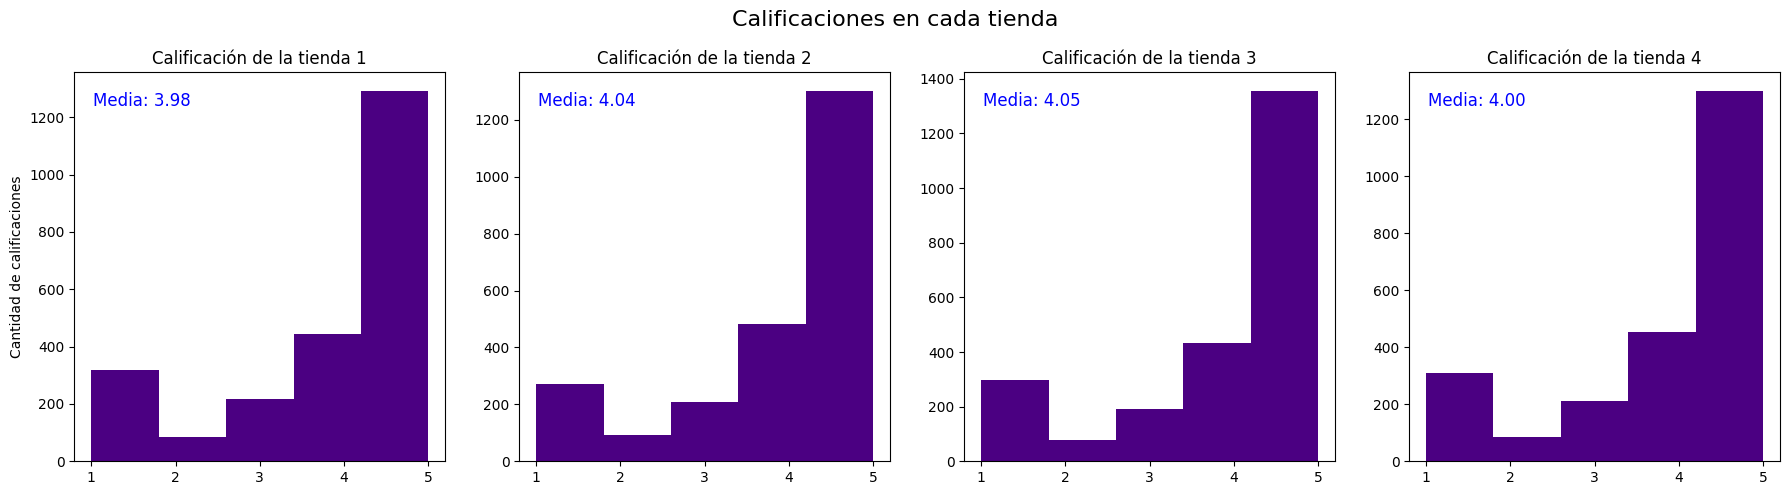

In [5]:
print('Calificación promedio de cada tienda:')
print('-> Tienda 1: %.3lf' %tienda1['Calificación'].mean())
print('-> Tienda 2: %.3lf' %tienda2['Calificación'].mean())
print('-> Tienda 3: %.3lf' %tienda3['Calificación'].mean())
print('-> Tienda 4: %.3lf' %tienda4['Calificación'].mean())


fig, axes = plt.subplots(1, 4, figsize=(18, 5))
fig.suptitle('Calificaciones en cada tienda', fontsize=16)

for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4]):
    tienda['Calificación'].hist(bins=5, ax=axes[i], grid=False, color='indigo')
    axes[i].set_title(f'Calificación de la tienda {i+1}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticks(range(1,6))

    prom = tienda['Calificación'].mean()
    axes[i].text(0.05, 0.95, f'Media: {prom:.2f}', transform=axes[i].transAxes,
                 fontsize=12, verticalalignment='top', color='b')

axes[0].set_ylabel('Cantidad de calificaciones')
fig.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.show()

> Notamos que todas las tiendas sostienen una calificación promedio de 4.

# 4. Productos más y menos vendidos

Haremos un catálogo de los 5 productos más vendidos y los 5 menos vendidos para cada tienda.


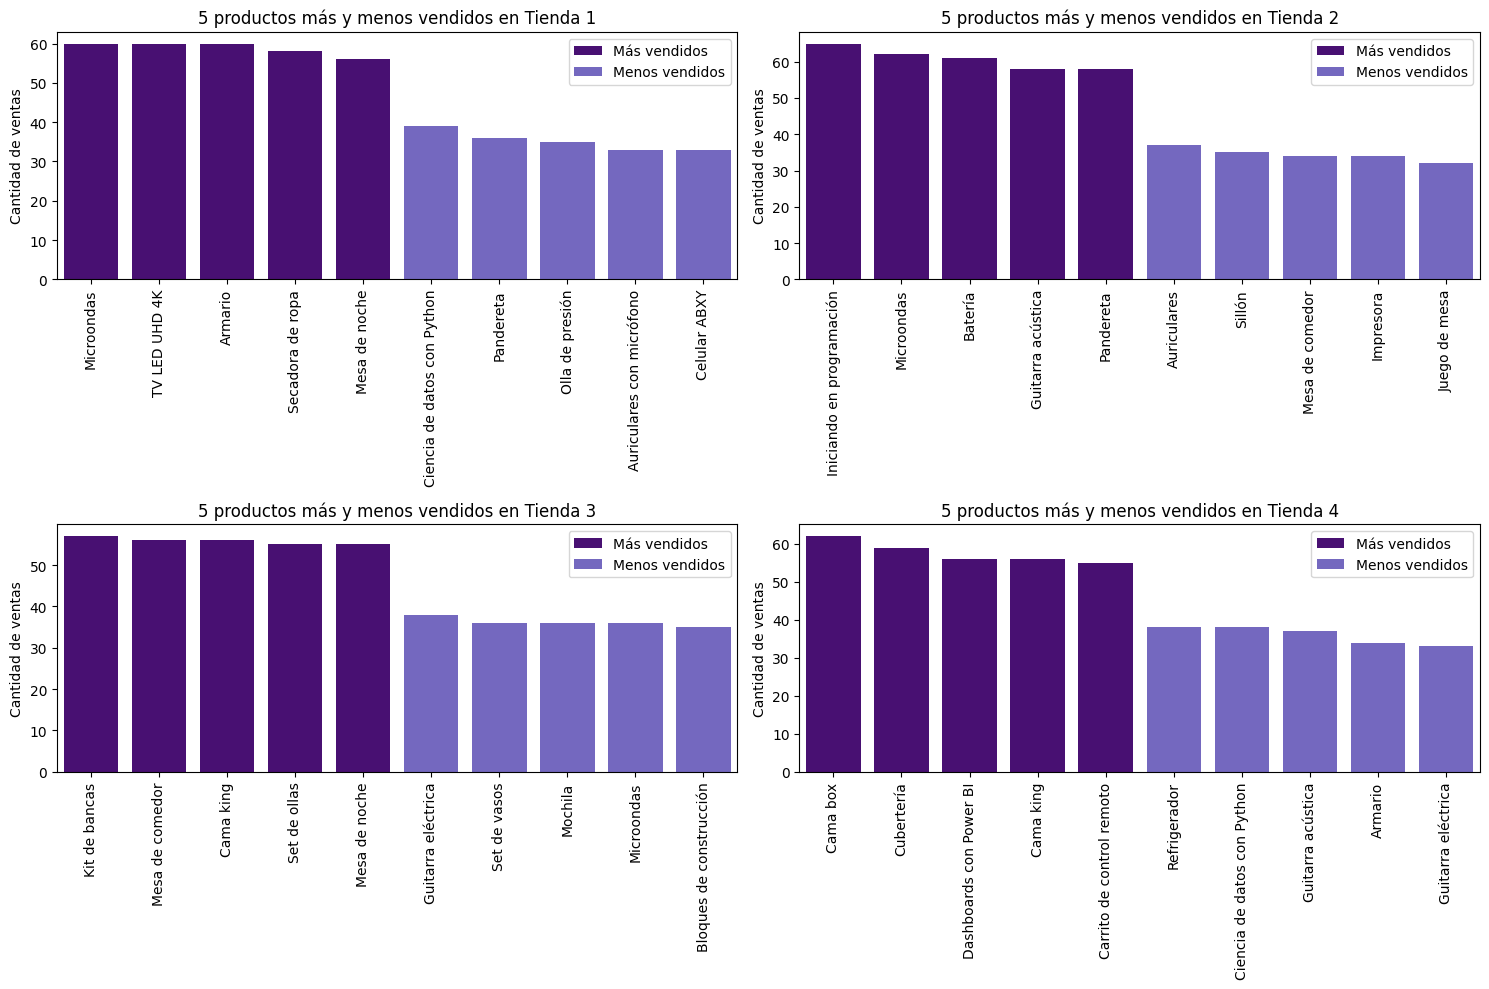

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

tops = pd.DataFrame(columns=['Producto', 'Tienda', 'count'])
bottoms = pd.DataFrame(columns=['Producto', 'Tienda', 'count'])

for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4]):
    products = tienda['Producto'].value_counts()     # Productos vendidos de mayor a menor
    top = products.head(5)
    bottom = products.tail(5)

    temp = pd.DataFrame(top).reset_index()
    temp['Tienda'] = [i+1]*5
    tops = pd.concat([tops, temp], ignore_index=True)

    temp = pd.DataFrame(bottom).reset_index()
    temp['Tienda'] = [i+1]*5
    bottoms = pd.concat([bottoms, temp], ignore_index=True)

    sns.barplot(x=top.index, y=top.values, ax=axes[i], color='indigo', label='Más vendidos')
    sns.barplot(x=bottom.index, y=bottom.values, ax=axes[i], color='slateblue', label='Menos vendidos')
    axes[i].set_title(f'5 productos más y menos vendidos en Tienda {i+1}')
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_ylabel('Cantidad de ventas')
    axes[i].set_xlabel('')

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()
plt.show()

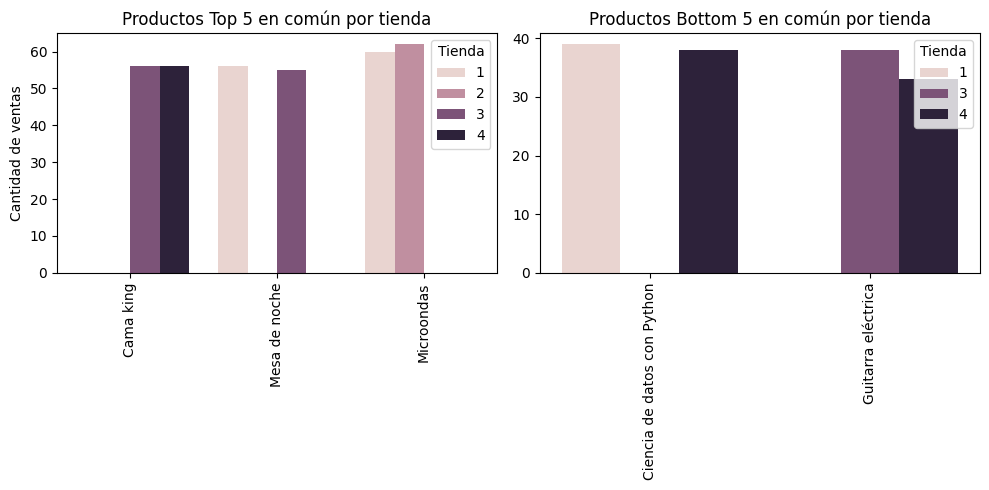

In [25]:
comunes_top5 = tops[tops.duplicated('Producto', keep=False)]
comunes_top5 = comunes_top5.groupby(['Producto', 'Tienda'])['count'].sum().reset_index()
# print("Productos Top 5 en común:")
# display(comunes_top5)

# ---------------------------
comunes_bottom5 = bottoms[bottoms.duplicated('Producto', keep=False)]
comunes_bottom5 = comunes_bottom5.groupby(['Producto', 'Tienda'])['count'].sum().reset_index()
# print("Productos Bottom 5 en común:")
# display(comunes_bottom5)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x='Producto', y='count', hue='Tienda', data=comunes_top5, ax=axes[0])
axes[0].set_title('Productos Top 5 en común por tienda')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Cantidad de ventas')
axes[0].set_xlabel('')

sns.barplot(x='Producto', y='count', hue='Tienda', data=comunes_bottom5, ax=axes[1])
axes[1].set_title('Productos Bottom 5 en común por tienda')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('')
axes[1].set_xlabel('')

fig.tight_layout()

* Cama King aparece en el Top de Tienda 3 y Tienda 4, lo que confirma que es un producto sólido en la cadena.

* Muebles de gran tamaño (armario, mesa de comedor, cama box, set de ollas, mesa de noche) dominan los rankings de varias tiendas.

* Ciencia de datos con Python aparece en el Bottom de Tienda 1 y 4, la categoría de libros técnicos no tiene gran salida.

> Es difícil concluir a partir de estos rankings debido a que lo que es fuerte en una tienda puede ser débil en otra (ej. Microondas en Tienda 3), lo que indica que el perfil de cliente cambia por zona.

# 5. Envío promedio por tienda


In [33]:
print('Costo promedio de envío en cada tienda:')
print('-> Tienda 1: %.3lf' %tienda1['Costo de envío'].mean())
print('-> Tienda 2: %.3lf' %tienda2['Costo de envío'].mean())
print('-> Tienda 3: %.3lf' %tienda3['Costo de envío'].mean())
print('-> Tienda 4: %.3lf' %tienda4['Costo de envío'].mean())

print('\nCosto de envío como porcentaje del precio promedio de ventas:')
print('-> Tienda 1: %.3lf' %(tienda1['Costo de envío'].mean()/tienda1['Precio'].mean()*100), '%')
print('-> Tienda 2: %.3lf' %(tienda2['Costo de envío'].mean()/tienda2['Precio'].mean()*100), '%')
print('-> Tienda 3: %.3lf' %(tienda3['Costo de envío'].mean()/tienda3['Precio'].mean()*100), '%')
print('-> Tienda 4: %.3lf' %(tienda4['Costo de envío'].mean()/tienda4['Precio'].mean()*100), '%')

Costo promedio de envío en cada tienda:
-> Tienda 1: 26018.610
-> Tienda 2: 25216.236
-> Tienda 3: 24805.680
-> Tienda 4: 23459.457

Costo de envío como porcentaje del precio promedio de ventas:
-> Tienda 1: 5.333 %
-> Tienda 2: 5.329 %
-> Tienda 3: 5.329 %
-> Tienda 4: 5.327 %


* Los costos de envío son más altos en la tienda 1 (la que también tiene mayores ingresos), mientras que la tienda 4 tiene los más bajos, sin embargo, la diferencia absoluta no es muy grande, a comparación de las ganancias totales en las tiendas.

* Todas las tiendas tienen prácticamente el mismo peso del envío respecto al precio del producto (~5.33 %), lo que indica que no se está cobrando en ninguna tienda un monto adicional de envío.

> La Tienda 1 tiene mayores ventas totales y productos de mayor valor promedio, mientras que el envío, aunque un poco más alto, no afecta la competitividad.
>
> La Tienda 4 es más barata y su valor de envío no difiere mucho a la Tienda 1, pero tiene ventas totales bastante menores en comparación con las demás.

# Decisión final

Todas las tiendas tienen calificaciones y costos de envío similares, así como también se mantienen las ventas por categorías de productos, sin embargo, la Tienda 1 lidera las ventas en el mercado de Alura Store.

Se decide vender la Tienda 4 porque la Tienda 4 atrae a clientes interesados en productos de menor precio y menos populares, además de que genera menos ingresos.